In [1]:
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from matplotlib import colorbar, colors
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/home/danial/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: MatplotlibDeprecationWarning: 
The set_clim function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use ScalarMappable.set_clim instead.


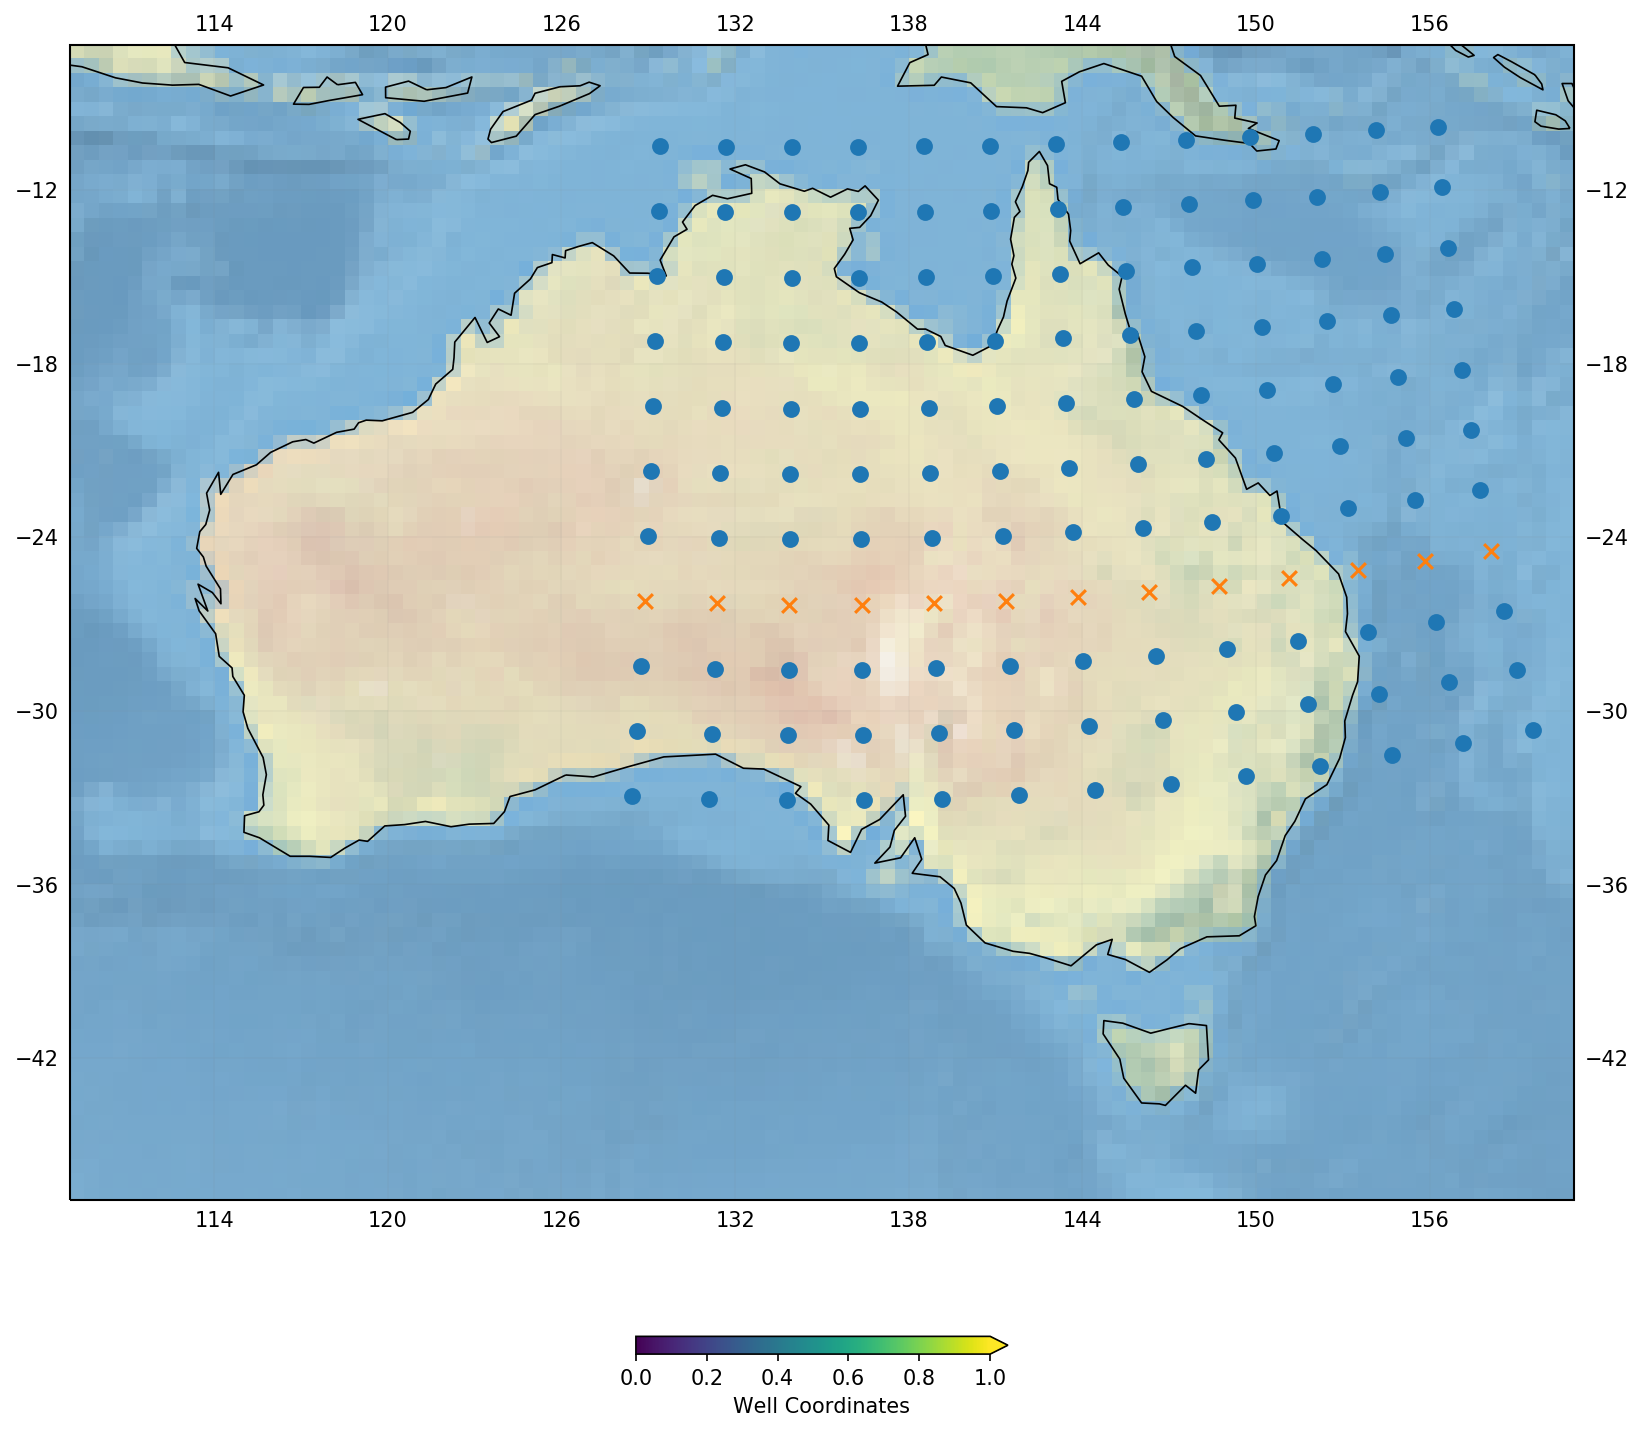

In [20]:
###Set up the figure
fig = plt.figure(figsize=(16,12),dpi=150)

ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img() #This is a simple background 'blue marble' image.
ax.set_extent([109, 161, -7, -44]) #lon/lat extent of image
ax.coastlines('110m', linewidth=0.8)

#Add the map grid lines and format them
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='gray', alpha=0.5, linestyle='-')
df = pd.read_csv('Examples/australia/data/WellCoordinates_250km_grid.csv')
# df.head()
dfD = df.loc[df['ID'].str.contains('D')]
dfRest = df.loc[df['ID'].str.contains('D')==False]

#Scatter plot     
xh=dfRest['Lon']
yh=dfRest['Lat']

dxh = dfD['Lon']
dyh = dfD['Lat']

# ages=MLdata1[:,4]
l2 = ax.scatter(xh, yh, 50, marker='o',cmap=plt.cm.hsv,zorder=3)
l3 = ax.scatter(dxh, dyh, 50, marker = 'x', cmap = plt.cm.hsv, zorder =3)

#colorbar, with the scale pointing from 0 to infinity
cbar=fig.colorbar(l2, ax=ax, orientation="horizontal", pad=0.1, fraction=0.05, shrink=0.2,extend='max')
cbar.set_clim(0, 170)
cbar.set_label('Well Coordinates')

plt.show()